## Importing required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [3]:
#import the dataset
df=pd.read_csv('CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Descriptive statistics of numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1) Here SeniorCitizen is a categorical column hence the quartile distribution is not proper 
   and 0,1 in column indicates if the person is senior or not 

2) 75 % of sustomers have less than 55 months tenure

3) We can observe the difference in std deviation and mean is more . 

4) more than 25 % of customer pay more than 89 USD per month


In [7]:
# Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


   In this ,we can see that the dtype of the coulmn Total Charges is object . it must be changed to int or float type
   

In [8]:
# changing the datatype of TotalCharges column to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.TotalCharges.dtypes

dtype('float64')

In [9]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

###  We should try to analysis the churning


0 5174
1 1869


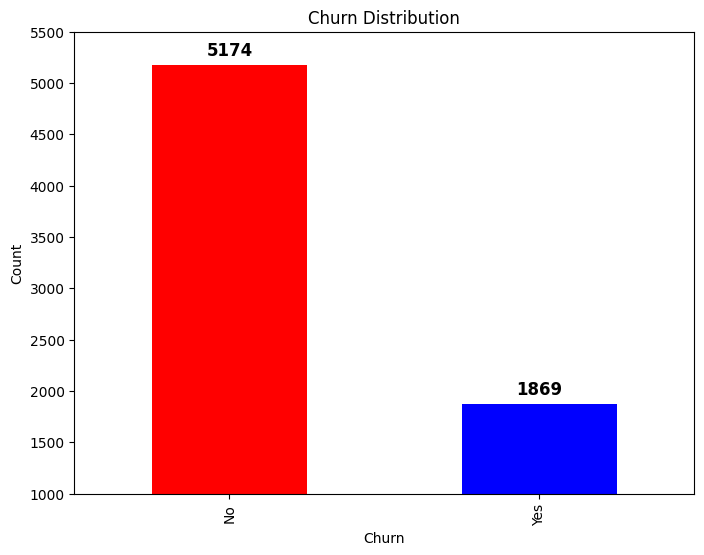

In [10]:
# Visualization of churn
plt1=df["Churn"].value_counts().plot(kind='bar',color=['red','blue'],figsize=(8,6))
plt1.set_title("Churn Distribution")
plt1.set_xlabel("Churn") 
plt1.set_ylabel("Count")
plt1.set_ylim(1000,5500)
for i, v in enumerate(df["Churn"].value_counts()):
    print(i, v)
    plt1.text(i,v + 100, str(v),color="Black",fontweight='bold',fontsize=12,ha='center')

We active 5174 Active Users and 1869 users who exited 

In [11]:
## Checking for missing values
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
gender               0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
dtype: int64

In [12]:
## filling the missing values with medain
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True);

C:\Users\PUNITH\AppData\Local\Temp\ipykernel_23196\3954997277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True);


In [13]:
#checking for missing values again
df.isnull().sum().sum()
# no missing values now

0

In [14]:
df_copy=df.copy()

In [15]:
#Grouping the tenure column
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

df_copy['Tensure_Bins']=pd.cut(df.tenure,range(1,76,12),include_lowest=True,labels=labels)

df_copy[['Tensure_Bins','tenure']].head(10)

,Tensure_Bins,tenure
0,1 - 12,1
1,25 - 36,34
2,1 - 12,2
3,37 - 48,45
4,1 - 12,2
5,1 - 12,8
6,13 - 24,22
7,1 - 12,10
8,25 - 36,28
9,61 - 72,62


In [16]:
## Deleting the tenure column
#df_copy.drop(['tenure','customerID'],axis=1,inplace=True)
df_copy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tensure_Bins'],
      dtype='object')

# Analysis

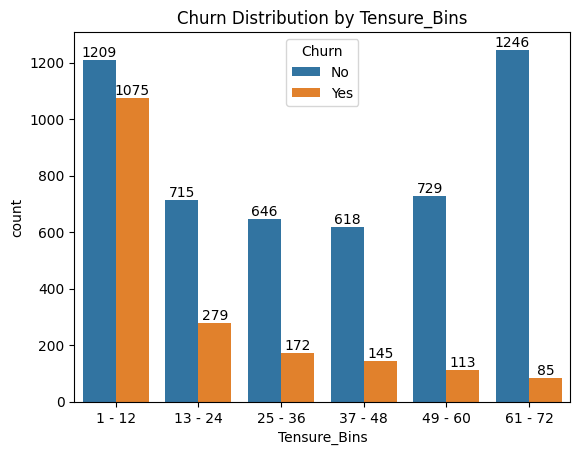

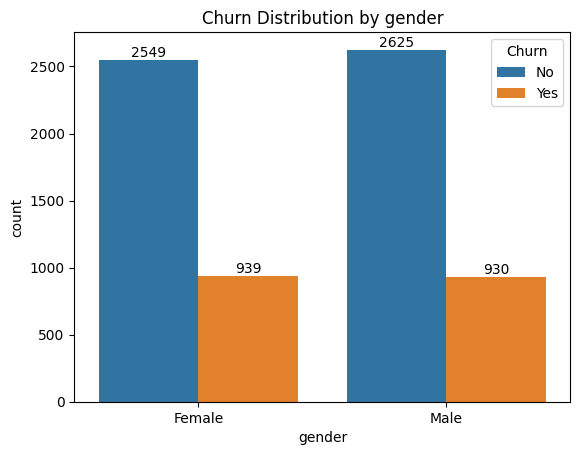

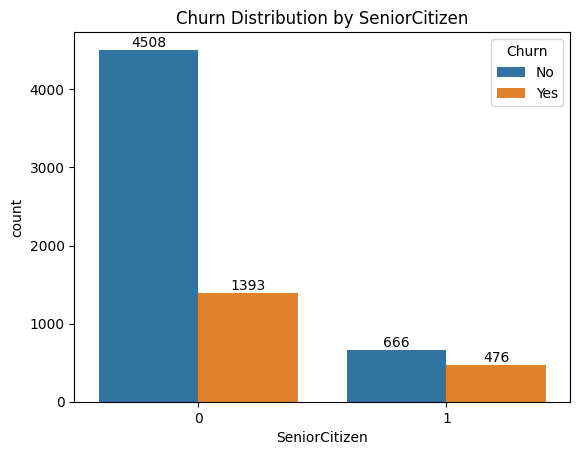

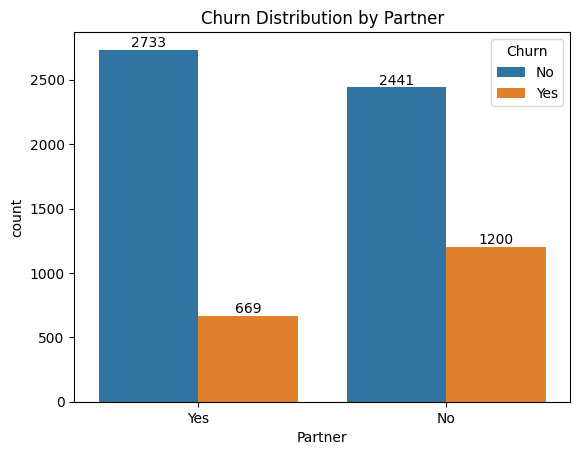

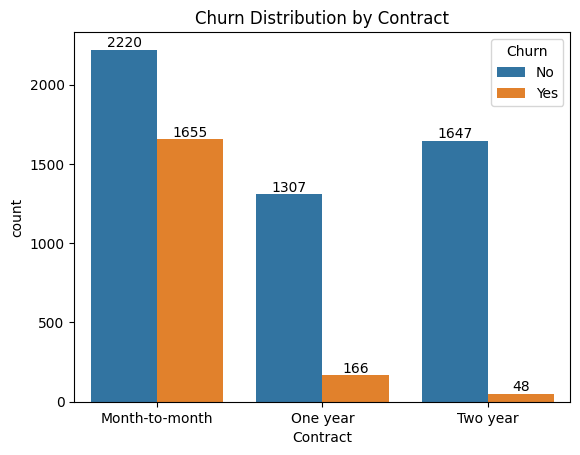

In [17]:
for i,v in enumerate(df_copy[["Tensure_Bins","gender","SeniorCitizen","Partner",'Contract']]):
    plt.figure(i)
    a=sns.countplot(data=df_copy,x=v,hue="Churn")
    plt.title(f"Churn Distribution by {v}")
    for container in a.containers:
        a.bar_label(container)



Insights:
1) Senior Citizens are most likely to churn
   Reasoning :
   Over 44% of SeniorCitizen have Churned 
2) Month to month Contract users are most likely to churn 
   Reasoning:
   42% of month to month users have churned
3) User with no partners have churned more than the users with partner
4) Users with lesser Tenure Period are more likely to churn

In [18]:
df_copy.groupby(["PaymentMethod","Churn"]).Churn.size()


PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: Churn, dtype: int64

In [19]:
pd.pivot_table(data=df_copy,index='PaymentMethod',columns='Churn',values='customerID',aggfunc='count')

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [20]:
df_copy["Churn_new"]=df_copy["Churn"].apply(lambda x:1 if x=="Yes" else 0)

In [21]:
df_dummies=pd.get_dummies(df_copy,drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_new,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tensure_Bins_13 - 24,Tensure_Bins_25 - 36,Tensure_Bins_37 - 48,Tensure_Bins_49 - 60,Tensure_Bins_61 - 72
0,0,1,29.85,29.85,0,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,2,53.85,108.15,1,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False


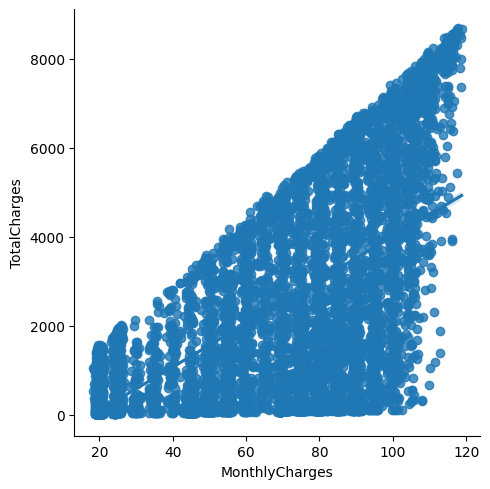

In [22]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df_dummies)

In [23]:
df_copy['MonthlyCharges'].corr(df_copy['TotalCharges'])

0.6508643497230397

AS Monthly Charges increses the Total Charges will increase

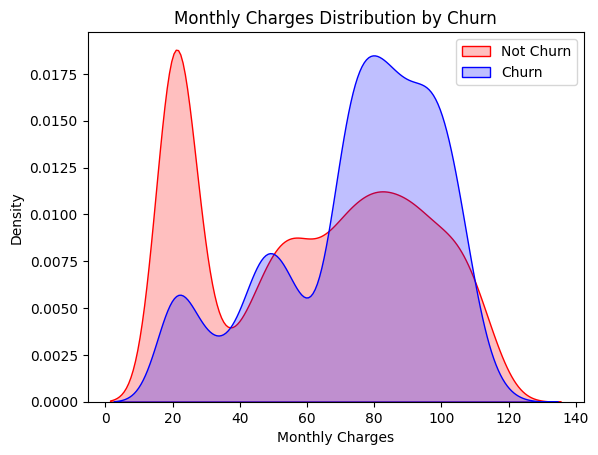

In [24]:
mth=sns.kdeplot(df_copy['MonthlyCharges'][df_copy["Churn_new"]==0],color='red',fill=True)
mth=sns.kdeplot(df_copy['MonthlyCharges'][df_copy["Churn_new"]==1],color='blue',fill=True)
mth.set_xlabel("Monthly Charges")
mth.set_ylabel("Density")   
mth.set_title("Monthly Charges Distribution by Churn")
mth.legend(["Not Churn","Churn"])

The Churn is due to the increase in monthly Charges

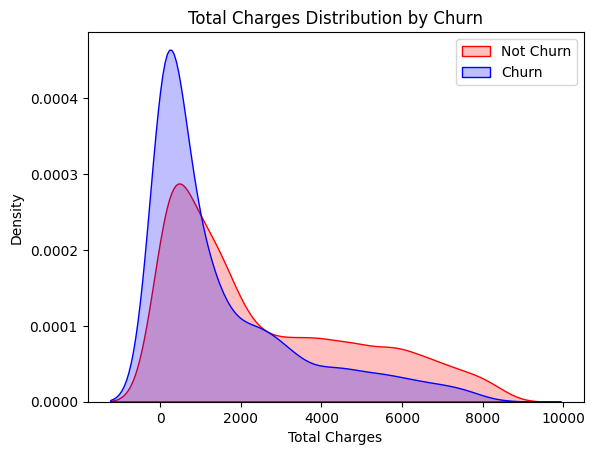

In [25]:
mth=sns.kdeplot(df_copy['TotalCharges'][df_copy["Churn_new"]==0],color='red',fill=True)
mth=sns.kdeplot(df_copy['TotalCharges'][df_copy["Churn_new"]==1],color='blue',fill=True)
mth.set_xlabel("Total Charges")
mth.set_ylabel("Density")   
mth.set_title("Total Charges Distribution by Churn")
mth.legend(["Not Churn","Churn"])

Suprising Insight , Even at lower total Charges the churn Rate is higher
And Maybe this result is due to higher Monthly Charge at less tenure 

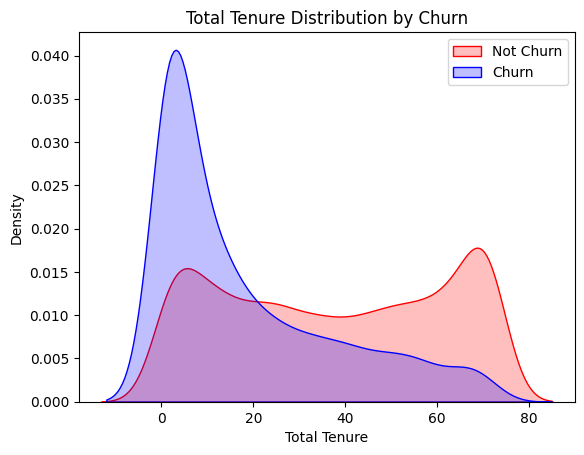

In [29]:
mth=sns.kdeplot(df_copy['tenure'][df_copy["Churn_new"]==0],color='red',fill=True)
mth=sns.kdeplot(df_copy['tenure'][df_copy["Churn_new"]==1],color='blue',fill=True)
mth.set_xlabel("Total Tenure")
mth.set_ylabel("Density")   
mth.set_title("Total Tenure Distribution by Churn")
mth.legend(["Not Churn","Churn"])

The users with less Tenure will mostly likely to Exit 


Conclusion

The churn analysis provided valuable insights into customer behavior and factors contributing to attrition. The study revealed that tenure plays a crucial role in customer retention — users with shorter tenure are significantly more likely to exit. Interestingly, even customers with lower total charges showed a higher churn rate, suggesting that high monthly charges during early tenure periods could be a key driver of dissatisfaction and early dropout.

Further analysis highlighted several demographic and behavioral patterns influencing churn. Senior citizens exhibited the highest churn rate, with over 44% leaving the service, possibly due to cost sensitivity or limited usage needs. Customers on month-to-month contracts also showed a churn rate of around 42%, indicating that flexible contracts correlate with weaker long-term engagement. Additionally, users without partners were more likely to churn, suggesting that social or shared usage factors might influence retention.

Overall, the analysis indicates that higher monthly charges, shorter tenure, and non-contract-based customers are major risk indicators for churn. Focusing on pricing optimization, loyalty programs, and personalized retention strategies for these customer segments can significantly reduce churn and improve customer lifetime value.